In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
df=pd.read_csv("ENB2012_data.csv")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df = df.rename(columns = { 'X1': 'Relative_Compactness',
                           'X2': 'Surface_Area',
                           'X3': 'Wall_Area',
                           'X4': 'Roof_Area',
                           'X5': 'Overall_Height',
                           'X6': 'Orientation',
                           'X7': 'Glazing_Area',
                           'X8': 'Glazing_Area_Distribution',
                           'Y1': 'Heating_Load',
                           'Y2': 'Cooling_Load'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


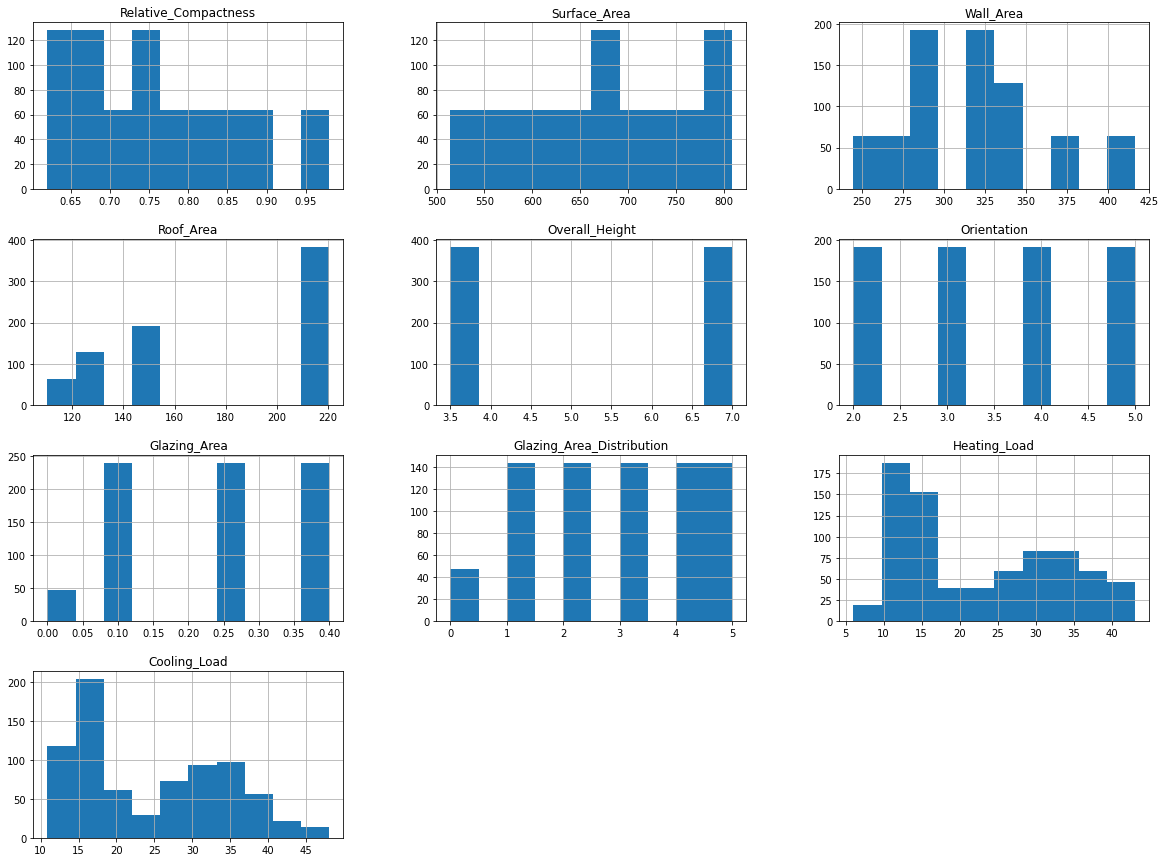

In [7]:
df.hist(figsize = (20,15))
plt.show()

Distribution of all the features are plotted. 

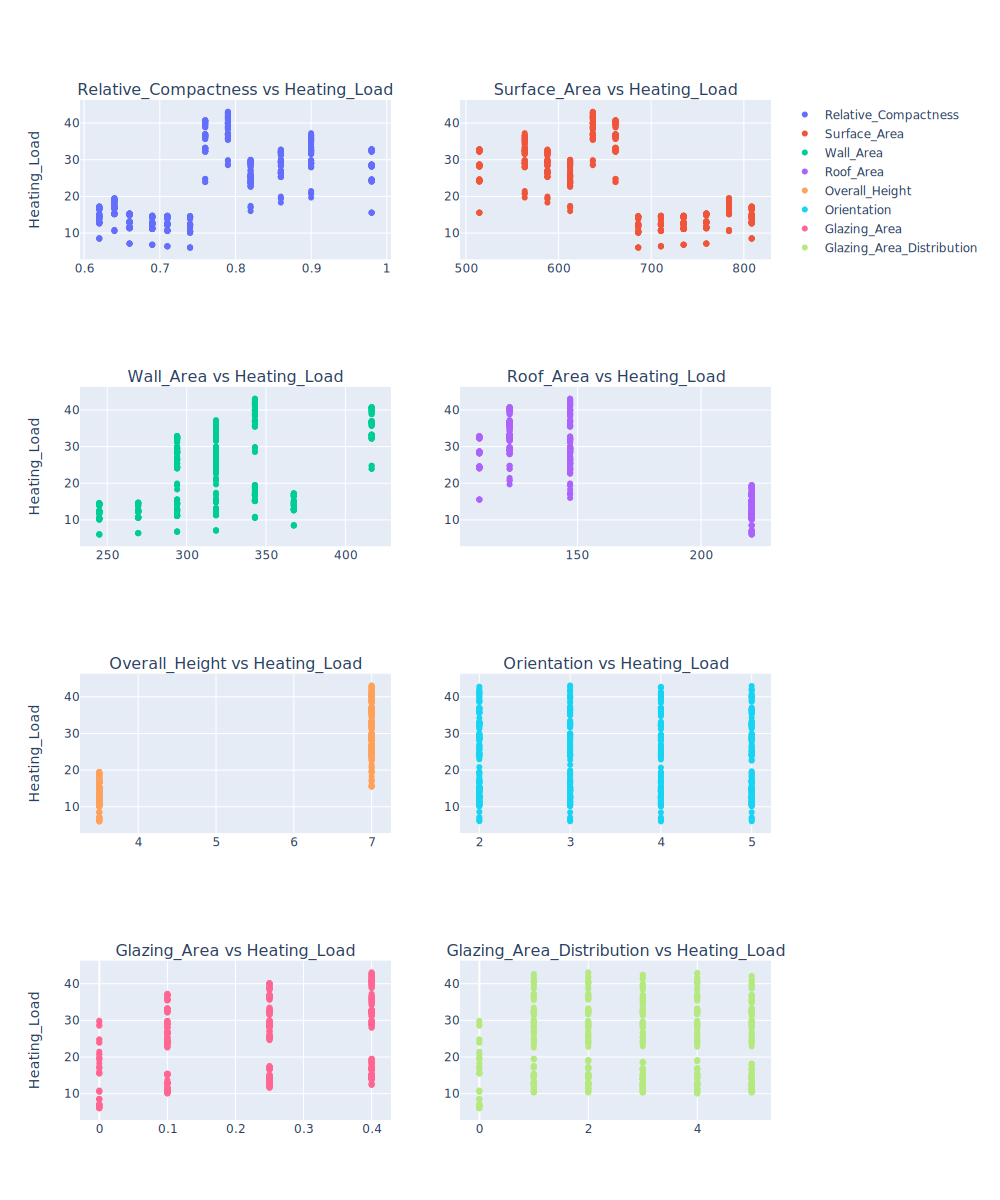

In [8]:
fig = make_subplots(rows=4, cols=2, subplot_titles=['Relative_Compactness vs Heating_Load',
                                                    'Surface_Area vs Heating_Load',
                                                    'Wall_Area vs Heating_Load',
                                                    'Roof_Area vs Heating_Load',
                                                    'Overall_Height vs Heating_Load',
                                                    'Orientation vs Heating_Load',
                                                    'Glazing_Area vs Heating_Load',
                                                    'Glazing_Area_Distribution vs Heating_Load'])
fig.add_trace(go.Scatter(x=df.Relative_Compactness, y=df.Heating_Load,
                         name='Relative_Compactness', mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Surface_Area, y=df.Heating_Load,
                         name='Surface_Area', mode='markers'),row=1, col=2)
fig.add_trace(go.Scatter(x=df.Wall_Area, y=df.Heating_Load,
                         name='Wall_Area', mode='markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.Roof_Area, y=df.Heating_Load,
                         name='Roof_Area', mode='markers'), row=2, col=2)
fig.add_trace(go.Scatter(x=df.Overall_Height, y=df.Heating_Load,
                         name='Overall_Height',mode='markers'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.Orientation, y=df.Heating_Load,
                         name='Orientation', mode='markers'), row=3, col=2)
fig.add_trace(go.Scatter(x=df.Glazing_Area, y=df.Heating_Load,
                         name='Glazing_Area', mode='markers'), row=4, col=1)
fig.add_trace(go.Scatter(x=df.Glazing_Area_Distribution, y=df.Heating_Load,
                         name='Glazing_Area_Distribution', mode='markers'), row=4, col=2)
fig.update_layout(width=1000,height=1200)
fig.update_yaxes(title_text="Heating_Load", row=1, col=1)
# fig.update_yaxes(title_text="Heating_Load", row=1, col=2)
fig.update_yaxes(title_text="Heating_Load", row=2, col=1)
# fig.update_yaxes(title_text="Heating_Load", row=2, col=2)
fig.update_yaxes(title_text="Heating_Load", row=3, col=1)
# fig.update_yaxes(title_text="Heating_Load", row=3, col=2)
fig.update_yaxes(title_text="Heating_Load", row=4, col=1)
# fig.update_yaxes(title_text="Heating_Load", row=4, col=2)
fig.show("svg")

The above plot shows plot between the features and target variable Heating_Load.

No particular patterns can be observed.  

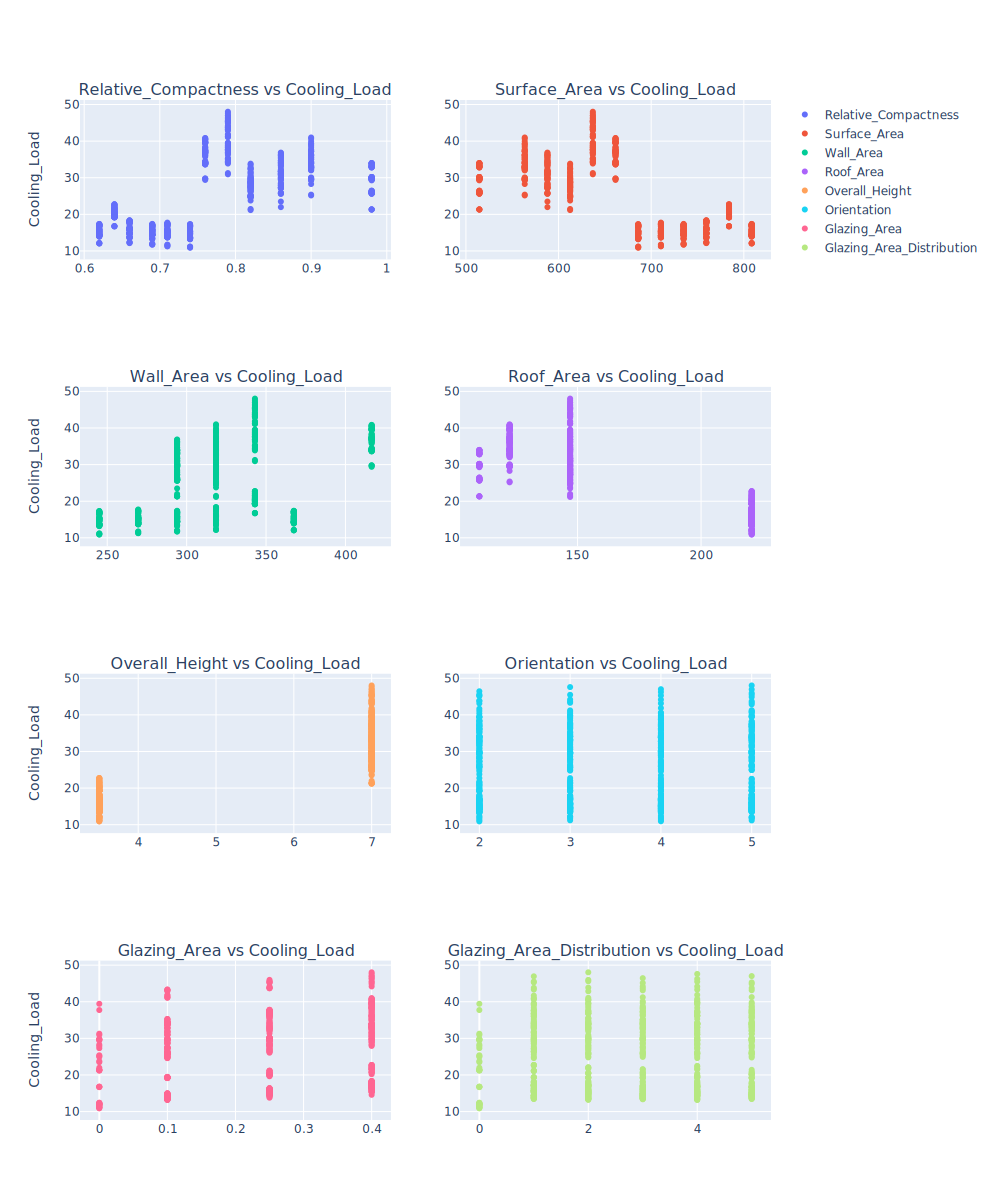

In [9]:
fig = make_subplots(rows=4, cols=2, subplot_titles=['Relative_Compactness vs Cooling_Load',
                                                    'Surface_Area vs Cooling_Load',
                                                    'Wall_Area vs Cooling_Load',
                                                    'Roof_Area vs Cooling_Load',
                                                    'Overall_Height vs Cooling_Load',
                                                    'Orientation vs Cooling_Load',
                                                    'Glazing_Area vs Cooling_Load',
                                                    'Glazing_Area_Distribution vs Cooling_Load'])
fig.add_trace(go.Scatter(x=df.Relative_Compactness, y=df.Cooling_Load,
                         name='Relative_Compactness',mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.Surface_Area, y=df.Cooling_Load,
                         name='Surface_Area',mode='markers'),row=1, col=2)
fig.add_trace(go.Scatter(x=df.Wall_Area, y=df.Cooling_Load,
                         name='Wall_Area',mode='markers'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.Roof_Area, y=df.Cooling_Load,
                         name='Roof_Area',mode='markers'), row=2, col=2)
fig.add_trace(go.Scatter(x=df.Overall_Height, y=df.Cooling_Load,
                         name='Overall_Height',mode='markers'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.Orientation, y=df.Cooling_Load,
                         name='Orientation',mode='markers'), row=3, col=2)
fig.add_trace(go.Scatter(x=df.Glazing_Area, y=df.Cooling_Load,
                         name='Glazing_Area',mode='markers'), row=4, col=1)
fig.add_trace(go.Scatter(x=df.Glazing_Area_Distribution, y=df.Cooling_Load,
                         name='Glazing_Area_Distribution',mode='markers'), row=4, col=2)
fig.update_layout(width=1000,height=1200)
fig.update_yaxes(title_text="Cooling_Load", row=1, col=1)
# fig.update_yaxes(title_text="Cooling_Load", row=1, col=2)
fig.update_yaxes(title_text="Cooling_Load", row=2, col=1)
# fig.update_yaxes(title_text="Cooling_Load", row=2, col=2)
fig.update_yaxes(title_text="Cooling_Load", row=3, col=1)
# fig.update_yaxes(title_text="Cooling_Load", row=3, col=2)
fig.update_yaxes(title_text="Cooling_Load", row=4, col=1)
# fig.update_yaxes(title_text="Cooling_Load", row=4, col=2)
fig.show("svg")

The above plot shows plot between the features and target variable Cooling_Load.

As we can see, no particular patterns can be observed.  

### Splitting the data

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['Heating_Load','Cooling_Load'],axis=1)
y = df[['Heating_Load','Cooling_Load']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30)

### Scaling the data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

regressor_linear = LinearRegression()
regressor_linear.fit(X_train_scaled, y_train)
y_pred_lr = regressor_linear.predict(X_test_scaled)
# cv_regressor_linear= cross_val_score(regressor_linear,X_train_scaled,y_train,cv=10).mean()
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_lr))
# print("Cross_validation score:",cv_regressor_linear)

R2- SCORE: 0.9155590566126666


### KNN regression

In [13]:
from sklearn.neighbors import KNeighborsRegressor

for k in range(1,20):
  regressor_knn = KNeighborsRegressor(n_neighbors=k)
  regressor_knn.fit(X_train_scaled, y_train)
  y_pred_knn = regressor_knn.predict(X_test_scaled)

print('R2- SCORE:', metrics.r2_score(y_test,y_pred_knn))

R2- SCORE: 0.9279635593722306


### Decision tree regression

In [14]:
from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train_scaled, y_train)
y_pred_dt = regressor_dt.predict(X_test_scaled)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

R2- SCORE: 0.9742232765657726


### Random forest regression

In [15]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 30)
regressor_rf.fit(X_train_scaled, y_train)
y_pred_rf = regressor_rf.predict(X_test_scaled)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))

R2- SCORE: 0.983499738458771


### XG Boost

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear',verbosity = 0)).fit(X_train_scaled, y_train)
y_pred_xgb= multioutputregressor.predict(X_test_scaled)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_xgb))

R2- SCORE: 0.9970378243276801


In [18]:
print("R2 metric of models" )
print("Linear Regresion:",metrics.r2_score(y_test,y_pred_lr))
print("KNN regression:",metrics.r2_score(y_test,y_pred_knn))
print("Decision tree regression:",metrics.r2_score(y_test,y_pred_dt))
print("Random forest regression:",metrics.r2_score(y_test,y_pred_rf))
print("XG Boost:",metrics.r2_score(y_test,y_pred_xgb))

R2 metric of models
Linear Regresion: 0.9155590566126666
KNN regression: 0.9279635593722306
Decision tree regression: 0.9742232765657726
Random forest regression: 0.983499738458771
XG Boost: 0.9970378243276801


XG boost model using multioutput regressor seems to give the best R2 value followed by Random forest.

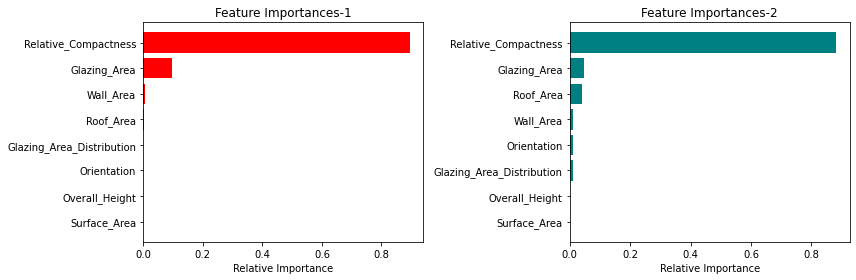

In [19]:
features=X.columns[:]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

importances = multioutputregressor.estimators_[0].feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances-1')
plt.barh(range(len(indices)), importances[indices],align='center',color='red')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

plt.subplot(1,2,2)

importances = multioutputregressor.estimators_[1].feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances-2')
plt.barh(range(len(indices)), importances[indices],align='center',color='teal')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

Feature importances using 2 estimators is plotted above.
The top features are Relative_Compactness,Glazing_Area,Wall_Area and Roof_Area.   